## We will install a package called yfinance 
# We will use download method to down load price information for a given symbol for

## Using the download method for any start date and end date for intervals daily ,weekly, monthly, and intraday with 1-minute , 15-minutes, 30-minutes and one hour intervals

## We will use the Ticker method to download price data and discuss its advantages

## We will use the info method to get Stock information attributes available in yahoo.finance  We will use other methods to extract analysts recommendations, corporate actions, major_holders and institutional holdings

## we will demonstrate a loop that extracts specific attributes for a list of symbols from yfinance and creates a data frame 

## Import panda and label it as pd

In [182]:
import pandas as pd

In [183]:
import os ## this allows submission of terminal commands from jupyter note book

## We need to install and import yfinance. Thios is a package developed to extract data from yahoo.finance web site.


In [184]:
os.getcwd()  ## shows the working directory

'/Users/yusifsimaan/Dropbox/classes/2U/Introduction to Financial data Analytics'

# #Unlike panda, yfinance is not part of the default python.3 packages. It has to be installed. The following command installs the package. ##Such package needs to be installed before being imported.

## Note that the character ! (shift 1) indicates submitting a system command from jupyter notebook

In [185]:
!pip install yfinance  ## The character  !  indicates tha you a submiting a sysem command from jupyer notebookos.getcwd() 

In [160]:
import yfinance as yf

## we can use yf to download prices for a specific symbol.

In [186]:
yf.download('amgn')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1983-06-17,0.000000,0.348958,0.343750,0.343750,0.272016,42936000
1983-06-20,0.000000,0.307292,0.302083,0.302083,0.239044,7329600
1983-06-21,0.000000,0.312500,0.302083,0.302083,0.239044,2280000
1983-06-22,0.000000,0.317708,0.312500,0.312500,0.247288,5937600
1983-06-23,0.000000,0.317708,0.312500,0.312500,0.247288,1272000
...,...,...,...,...,...,...
2021-03-17,240.309998,245.899994,239.220001,244.270004,244.270004,3212900
2021-03-18,240.500000,247.139999,240.500000,244.419998,244.419998,3063100
2021-03-19,245.740005,247.399994,241.630005,245.940002,245.940002,12589900


## By default yf.download,ownldsdaly price data frome the earliest day the symbol is listed. We can store the output in amgn_prices

In [187]:
amgn_prices = yf.download('amgn')
amgn_prices

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1983-06-17,0.000000,0.348958,0.343750,0.343750,0.272016,42936000
1983-06-20,0.000000,0.307292,0.302083,0.302083,0.239044,7329600
1983-06-21,0.000000,0.312500,0.302083,0.302083,0.239044,2280000
1983-06-22,0.000000,0.317708,0.312500,0.312500,0.247288,5937600
1983-06-23,0.000000,0.317708,0.312500,0.312500,0.247288,1272000
...,...,...,...,...,...,...
2021-03-17,240.309998,245.899994,239.220001,244.270004,244.270004,3212900
2021-03-18,240.500000,247.139999,240.500000,244.419998,244.419998,3063100
2021-03-19,245.740005,247.399994,241.630005,245.940002,245.940002,12589900


In [188]:
amgn_prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1983-06-17,0.0,0.348958,0.343750,0.343750,0.272016,42936000
1983-06-20,0.0,0.307292,0.302083,0.302083,0.239044,7329600
1983-06-21,0.0,0.312500,0.302083,0.302083,0.239044,2280000
1983-06-22,0.0,0.317708,0.312500,0.312500,0.247288,5937600
1983-06-23,0.0,0.317708,0.312500,0.312500,0.247288,1272000


In [189]:
type(amgn_prices)

pandas.core.frame.DataFrame

## Suppose I want to create a variable that stores the first trading day of 'amgn'

In [190]:
first=amgn_prices.index[0]
print(first)

1983-06-17 00:00:00


## Suppose I want to get the first day volume-- Two ways to do it.

In [191]:
amgn_prices.Volume[0]

42936000

In [13]:
amgn_prices['Volume'][0]

42936000

## Specifyng start and end and interval

## we can specify the begining data, the ending date and the price frequency window. Here is an example that specifies start date and end dat. We do not specify interval to determine the price frequency window. 

## THe auto_adjust=True makes sure that all prices are adjusted for split and div events. Note that the column Adj Close is not in the data because all prices are adjusted here.

## the option progress=False makes sure that the output file does not include texts reporting on the progress of the download.

In [192]:
amgn_2011_2020= yf.download('amgn',  start='2011-01-01', 
                      end='2020-12-29',auto_adjust=True ,
                      progress=False) 

In [18]:
amgn_2011_2020.head()

,Open,High,Low,Close,Volume
Date,,,,,
2011-01-03,43.680868,44.535492,43.665041,43.957829,5453300
2011-01-04,44.131935,45.295177,44.068628,44.907429,8429500
2011-01-05,44.677941,45.231866,44.630464,44.891598,4552000
2011-01-06,44.852033,45.247693,44.369327,44.749161,3561400
2011-01-07,44.709579,45.255589,44.677926,45.089413,4680800


In [193]:
amgn_2011_2020.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-21,224.014319,226.257649,219.944589,225.632294,2311400
2020-12-22,224.054033,224.808418,218.455661,219.358948,3571600
2020-12-23,219.845325,221.929831,219.031385,221.294556,1763500
2020-12-24,221.592347,222.922453,220.649346,221.284622,955400
2020-12-28,221.383894,225.225326,221.383894,221.999313,1495100


## Assume you invested a dollor in amgn in January 3, 2011 and held it to the end of 2020. Your terminal investment is: 

In [194]:
TV= amgn_2011_2020['Close'][-1]/amgn_2011_2020['Close'][0]
TV

5.050279343183595

## That the terminal investment includes reinvested dividends and accounts for any stock splits because we used the auto_adjust=True option

## The average annual growth for the 10-years investment is

In [195]:
(TV)**(1/10)-1

0.17579481324948043

In [196]:
amgn_2011_2020.shape

(2514, 5)

In [170]:
len(amgn_2011_2020.Close) ## this gives the total trading days in the decate. Roughly average of 252 trading days/year

2514

## Here is an example where we extract monthly prices

In [197]:
amgn_monthly = yf.download('amgn',  start='2019-01-01', 
                      end='2020-12-31', autu_adjust=True,
                     interval = '1mo' ,
                      progress=False) 

In [198]:
print( amgn_monthly.head() )

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-01  192.520004  204.330002  179.649994  187.110001  175.399460   
2019-02-01  186.509995  192.190002  182.669998  190.080002  178.183594   
2019-02-14         NaN         NaN         NaN         NaN         NaN   
2019-03-01  191.389999  192.869995  179.009995  189.979996  179.466827   
2019-04-01  191.139999  196.869995  174.869995  179.320007  169.396759   

                Volume  
Date                    
2019-01-01  73676200.0  
2019-02-01  55148000.0  
2019-02-14         NaN  
2019-03-01  60742700.0  
2019-04-01  59196600.0  


In [27]:
amgn_monthly.shape

(32, 6)

## Note that days with NaN are dividend days or split days in amgn_monthly

In [199]:
divdays=amgn_monthly[amgn_monthly['Close'].isnull()]
print(divdays)

            Open  High  Low  Close  Adj Close  Volume
Date                                                 
2019-02-14   NaN   NaN  NaN    NaN        NaN     NaN
2019-05-16   NaN   NaN  NaN    NaN        NaN     NaN
2019-08-14   NaN   NaN  NaN    NaN        NaN     NaN
2019-11-14   NaN   NaN  NaN    NaN        NaN     NaN
2020-02-13   NaN   NaN  NaN    NaN        NaN     NaN
2020-05-15   NaN   NaN  NaN    NaN        NaN     NaN
2020-08-14   NaN   NaN  NaN    NaN        NaN     NaN
2020-11-13   NaN   NaN  NaN    NaN        NaN     NaN


## we can specify the interval as one of the following: 1m, 5m, 15m, 30m, 60m, 1h, 1d, 1wk, 1mo, and more. Let us get 1m (one-minute) price data for two days. This data is available for only 7 days back

In [200]:
symbol= 'amgn'
amgn_im =yf.download(symbol,  start='2021-03-12', 
                      end='2021-03-18', 
                     interval = '1m' ,auto_adjust=True ,
                      progress=False) 

In [201]:
amgn_im.head()

,Open,High,Low,Close,Volume
Datetime,,,,,
2021-03-12 09:30:00-05:00,230.270004,230.270004,230.130005,230.130005,44964
2021-03-12 09:31:00-05:00,229.910004,230.240005,229.750000,229.919998,3627
2021-03-12 09:32:00-05:00,229.970001,230.059998,229.869995,229.919998,3652
2021-03-12 09:33:00-05:00,229.800003,229.899994,229.692307,229.692307,2794
2021-03-12 09:34:00-05:00,229.669998,229.699997,229.410004,229.600006,6539


In [202]:
amgn_im.shape

(1556, 5)

## Here we download 15-minutes interval data for 2021-02-22

In [203]:
amgn_20210317=yf.download('amgn',  start='2021-03-17', 
                      end='2021-03-18', 
                     interval = '15m' , auto_adjust=True ,
                      progress=False) 

In [204]:
amgn_20210317

,Open,High,Low,Close,Volume
Datetime,,,,,
2021-03-17 09:30:00-04:00,240.309998,240.970001,239.220001,240.054993,164692
2021-03-17 09:45:00-04:00,239.990005,241.500000,239.800003,240.529999,99932
2021-03-17 10:00:00-04:00,240.610001,240.785004,239.619400,240.550003,89435
2021-03-17 10:15:00-04:00,240.509995,241.678604,240.502701,241.604996,97828
2021-03-17 10:30:00-04:00,241.580002,242.770004,241.509995,242.669800,103731
2021-03-17 10:45:00-04:00,242.669998,242.750000,241.869995,242.720001,78108
2021-03-17 11:00:00-04:00,242.705002,242.740005,242.179993,242.570694,64273
2021-03-17 11:15:00-04:00,242.460007,243.050003,242.434998,242.860001,75305
2021-03-17 11:30:00-04:00,242.919998,243.639999,242.770004,243.639999,106281


## Let us plot how trading volume changes over the course of the day. Can you explain the shape of the of the Volume curve?

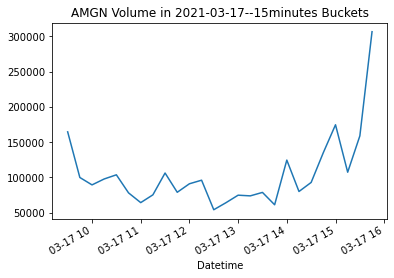

In [178]:
amgn_20210317['Volume'].plot(title="AMGN Volume in 2021-03-17--15minutes Buckets")

## Let us get data on SPY and generate the same graph.

In [205]:
spy_20210317= yf.download('spy',  start='2021-03-17', 
                      end='2021-03-18', 
                     interval = '15m' , auto_adjust=True ,
                      progress=False) 

In [206]:
spy_20210317.head()

,Open,High,Low,Close,Volume
Datetime,,,,,
2021-03-17 09:30:00-04:00,394.529999,394.600006,393.799988,394.600006,5596712
2021-03-17 09:45:00-04:00,394.609985,394.890015,394.290009,394.570007,2699512
2021-03-17 10:00:00-04:00,394.579987,394.670013,393.850006,394.489990,5043551
2021-03-17 10:15:00-04:00,394.488708,394.980011,394.309998,394.750000,3199115
2021-03-17 10:30:00-04:00,394.739990,394.739990,393.570892,393.589996,2513436


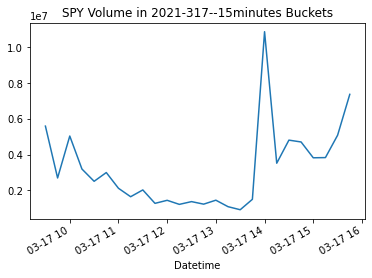

In [207]:
spy_20210317['Volume'].plot(title="SPY Volume in 2021-317--15minutes Buckets")

## The above U shape curve is typical indicating strong volume in the morning and at the end of the trading day. Here we have a typical volume spike due to a Fed ptojevtions release. If you are interested se the folliwing link

https://www.federalreserve.gov/monetarypolicy/fomcprojtabl20210317.htm

##  Using the Ticker method

## Aside from the yf.download function, we can use the Ticker() module.  Here are some examples usingb yf.Ticker

In [208]:
h0= yf.Ticker('amgn').history(  start='2019-12-21', 
                      end='2020-12-22' ,
                      interval='1wk')

In [209]:
h0.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-23,235.665331,235.684653,231.975521,233.298828,4482300.0,0.0,0
2019-12-30,233.173265,234.902272,228.189125,230.343124,7169700.0,0.0,0
2020-01-06,229.116385,232.719265,228.498197,230.140259,8943000.0,0.0,0
2020-01-13,230.140273,235.539782,226.788527,233.260208,10832700.0,0.0,0
2020-01-20,232.757936,233.762487,216.849219,217.902069,12201000.0,0.0,0


In [210]:
h1= yf.Ticker('amgn').history(  start='2019-12-21', 
                      end='2020-12-22' ,
                      interval='1wk', auto_adjust = True)

In [211]:
h1.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-23,235.665331,235.684653,231.975521,233.298828,4482300.0,0.0,0
2019-12-30,233.173265,234.902272,228.189125,230.343124,7169700.0,0.0,0
2020-01-06,229.116385,232.719265,228.498197,230.140259,8943000.0,0.0,0
2020-01-13,230.140273,235.539782,226.788527,233.260208,10832700.0,0.0,0
2020-01-20,232.757936,233.762487,216.849219,217.902069,12201000.0,0.0,0


In [212]:
h2= yf.Ticker('amgn').history(  start='2019-12-21', 
                      end='2020-12-22' ,
                      interval='1wk', auto_adjust = False)

In [213]:
h2.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2019-12-23,243.979996,244.000000,240.160004,241.529999,233.298828,4482300.0,0.0,0
2019-12-30,241.399994,243.190002,236.240005,238.470001,230.343124,7169700.0,0.0,0
2020-01-06,237.199997,240.929993,236.559998,238.259995,230.140259,8943000.0,0.0,0
2020-01-13,238.259995,243.850006,234.789993,241.490005,233.260208,10832700.0,0.0,0
2020-01-20,240.970001,242.009995,224.500000,225.589996,217.902069,12201000.0,0.0,0


## Note that this module adjusts prices for corporate actions by default. ThiS adjustment is important if you want to calculate returns from orevious Close to open. Using auto_adjust = True allows calculating returns correctly. Note that this method gives you dividend days and split days

In [169]:
h2.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2019-12-23,243.979996,244.000000,240.160004,241.529999,235.033539,4482300.0,0.0,0
2019-12-30,241.399994,243.190002,236.240005,238.470001,232.055847,7169700.0,0.0,0
2020-01-06,237.199997,240.929993,236.559998,238.259995,231.851501,8943000.0,0.0,0
2020-01-13,238.259995,243.850006,234.789993,241.490005,234.994614,10832700.0,0.0,0
2020-01-20,240.970001,242.009995,224.500000,225.589996,219.522293,12201000.0,0.0,0


In [214]:
h= yf.Ticker('amgn').history(  start='2015-01-01', 
                      end='2020-12-31' ,
                      interval='1wk', auto_adjust = True)

## How can we get dividend days?

In [215]:
div_dates= h[h['Dividends' ] >0]

In [216]:
print(div_dates)

            Open  High  Low  Close  Volume  Dividends  Stock Splits
Date                                                               
2015-02-10   NaN   NaN  NaN    NaN     NaN       0.79             0
2015-05-12   NaN   NaN  NaN    NaN     NaN       0.79             0
2015-08-13   NaN   NaN  NaN    NaN     NaN       0.79             0
2015-11-12   NaN   NaN  NaN    NaN     NaN       0.79             0
2016-02-11   NaN   NaN  NaN    NaN     NaN       1.00             0
2016-05-13   NaN   NaN  NaN    NaN     NaN       1.00             0
2016-08-15   NaN   NaN  NaN    NaN     NaN       1.00             0
2016-11-14   NaN   NaN  NaN    NaN     NaN       1.00             0
2017-02-13   NaN   NaN  NaN    NaN     NaN       1.15             0
2017-05-15   NaN   NaN  NaN    NaN     NaN       1.15             0
2017-08-15   NaN   NaN  NaN    NaN     NaN       1.15             0
2017-11-16   NaN   NaN  NaN    NaN     NaN       1.15             0
2018-02-14   NaN   NaN  NaN    NaN     NaN      

In [217]:
split_dates = h[h['Stock Splits' ] >0]

In [218]:
print(split_dates)

Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits]
Index: []


## No stock splits in period 2015 to 2020

## Let us calculate Open to close returns and demonstrate some stats. Let us start with the folloowing data

In [219]:
h_daily= yf.Ticker('amgn').history(  start='2016-01-02', 
                      end='2020-12-31' ,
                      interval='1d', auto_adjust = True)

## Create a new column in the data fram that calculates return from Open to Close

In [220]:
h_daily['Open_to_Close_return'] = h_daily['Close'] /h_daily['Open'] -1 

In [221]:
h_daily.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open_to_Close_return
Date,,,,,,,,
2016-01-04,137.233194,137.423078,134.721565,136.663544,5083200,0.0,0,-0.004151
2016-01-05,137.233176,138.277535,135.722748,136.516800,2678900,0.0,0,-0.005220
2016-01-06,133.789440,136.309696,133.694498,135.265350,3826900,0.0,0,0.011032
2016-01-07,132.106327,135.032241,131.959601,132.037277,4162500,0.0,0,-0.000523
2016-01-08,132.158160,133.659962,129.862319,130.078094,4179600,0.0,0,-0.015739


In [222]:
max=h_daily['Open_to_Close_return'].max()

In [223]:
max

0.08322006831340034

In [224]:
min=h_daily['Open_to_Close_return'].min()

In [225]:
min


-0.06460768039298759

In [226]:
std=h_daily['Open_to_Close_return'].std()

In [376]:
std

0.013657482693367272

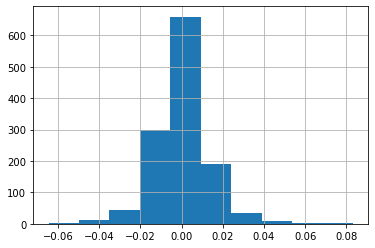

In [227]:
h_daily['Open_to_Close_return'].hist()

In [228]:
P99 = std=h_daily['Open_to_Close_return'].quantile(0.99)

In [229]:
P99

0.04176906705735489

In [230]:
P01 = std=h_daily['Open_to_Close_return'].quantile(0.01)

In [231]:
P01

-0.03699304283856174

In [82]:
range_0_99 = P99 - P01

In [234]:
range_0_99

0.07876210989591663

In [235]:
std = std=h_daily['Open_to_Close_return'].std()
std

0.01365748269336727

In [236]:
range_0_99_to_std = range_0_99/std
range_0_99_to_std

5.76695659546157

## For the normal distribution, 99% of the values are whithin mean+- 3 STDs. A ratio of 5.77 is very close to 6 and can be seen as consistent with normal distribution

## Explore Stock Information Data available in yfinance

## In addition to price data, Tickers allows us to get other stock information. Let us explore what information we can get

In [237]:
tkr_inf= yf.Ticker('amgn').get_info()

In [238]:
print(tkr_inf)

{'zip': '91320-1799', 'sector': 'Healthcare', 'fullTimeEmployees': 24300, 'longBusinessSummary': "Amgen Inc. discovers, develops, manufactures, and delivers human therapeutics worldwide. It focuses on inflammation, oncology/hematology, bone health, cardiovascular disease, nephrology and neuroscience areas. The company's products include Enbrel to treat plaque psoriasis, rheumatoid arthritis, and psoriatic arthritis; Neulasta that reduces the chance of infection due a low white blood cell count in patients cancer; Prolia to treat postmenopausal women with osteoporosis; Xgeva for skeletal-related events prevention; Otezla for the treatment of adult patients with plaque psoriasis, psoriatic arthritis, and oral ulcers associated with BehÃ§et's disease; Aranesp to treat a lower-than-normal number of red blood cells and anemia; KYPROLIS to treat patients with relapsed or refractory multiple myeloma; and Repatha, which reduces the risks of myocardial infarction, stroke, and coronary revascula

In [239]:
type(tkr_inf)

dict

## As you can see we can get a lot of information. Let us explore the object tkr_inf

In [240]:
tkr_inf['zip']

'91320-1799'

In [241]:
tkr_inf['sector']

'Healthcare'

In [245]:
tkr_inf['sharesShort']

8101042

## It is a dictionary. Let us create a data frame from this dictionary. It is easier to view it as a data frame

In [246]:
ticker_info = pd.DataFrame(list(tkr_inf.items()),columns = ['atribute','value']) 
ticker_info

,atribute,value
0,zip,91320-1799
1,sector,Healthcare
2,fullTimeEmployees,24300
3,longBusinessSummary,"Amgen Inc. discovers, develops, manufactures, ..."
4,city,Thousand Oaks
...,...,...
119,impliedSharesOutstanding,None
120,category,None
121,fiveYearAverageReturn,None
122,regularMarketPrice,249.99


## Let us create a csv file of this dataframe. We can use this file as a reference on what stock information is available

In [247]:
ticker_info.to_csv('available_yf_Ticker_info.csv', index = False)

## The above file will contain attributes available on the ticker. The option index=False suppresses creating a numerical index column.Here are few examples

In [248]:
sector =yf.Ticker(symbol).info['sector']

## or

In [249]:
tkr_inf['sector']

'Healthcare'

In [309]:
sector

'Healthcare'

In [250]:
industry =tkr_inf['industry']
industry

'Drug Manufacturers—General'

In [251]:
beta=tkr_inf['beta']

In [252]:
beta

0.7172259999999999

## Here is another method. It is analyst recommendation by firm and date

In [253]:
recommendations=yf.Ticker(symbol).recommendations

In [254]:
print(recommendations)

                                  Firm        To Grade From Grade Action
Date                                                                    
2012-02-09 07:23:00        Oppenheimer         Perform              down
2012-02-09 12:10:00                UBS         Neutral              main
2012-02-10 06:36:00     Morgan Stanley    Equal-Weight              init
2012-04-25 08:13:00      Goldman Sachs         Neutral              main
2012-04-25 08:18:00          Citigroup             Buy              main
...                                ...             ...        ...    ...
2021-02-03 18:09:45  Cantor Fitzgerald      Overweight              main
2021-03-01 16:02:02        SVB Leerink  Market Perform              main
2021-03-05 11:39:45        SVB Leerink  Market Perform              main
2021-03-05 13:17:15     Morgan Stanley      Overweight              main
2021-03-05 14:34:28           Barclays    Equal-Weight              main

[196 rows x 4 columns]


In [109]:
recommendations.to_csv('amgn_recommendations.csv', index = True) ## here the index is the recommendation date which we want to keep

# Here is corporate action events

In [110]:
yf.Ticker(symbol).actions

,Dividends,Stock Splits
Date,,
1990-08-13,0.00,2.0
1991-09-11,0.00,3.0
1995-08-16,0.00,2.0
1999-03-01,0.00,2.0
1999-11-22,0.00,2.0
2011-08-16,0.28,0.0
2011-11-15,0.28,0.0
2012-02-13,0.36,0.0
2012-05-14,0.36,0.0


## Here is information on major holders of the stock

In [255]:
amgn_major_holders= yf.Ticker(symbol).major_holders 

In [256]:
amgn_major_holders

,0,1
0,0.19%,% of Shares Held by All Insider
1,77.99%,% of Shares Held by Institutions
2,78.14%,% of Float Held by Institutions
3,2732,Number of Institutions Holding Shares


## Let us rename the columns of the above dataframe

In [257]:
amgn_major_holders.columns=['Percent', 'Holer']

In [258]:
amgn_major_holders

,Percent,Holer
0,0.19%,% of Shares Held by All Insider
1,77.99%,% of Shares Held by Institutions
2,78.14%,% of Float Held by Institutions
3,2732,Number of Institutions Holding Shares


In [115]:
amgn_major_holders.Percent[0]

'0.19%'

## Here is a breakdown of institutional holders

In [259]:
yf.Ticker(symbol).institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,Blackrock Inc.,47805794,2020-12-30,0.0828,10991508156
1,"Vanguard Group, Inc. (The)",47227229,2020-12-30,0.0818,10858484491
2,Capital Research Global Investors,31762327,2020-12-30,0.0550,7302794223
3,State Street Corporation,30093136,2020-12-30,0.0521,6919013829
4,Primecap Management Company,16978827,2020-12-30,0.0294,3903771903
5,"FMR, LLC",13781976,2020-12-30,0.0239,3168751921
6,Morgan Stanley,9745556,2020-12-30,0.0169,2240698235
7,"Geode Capital Management, LLC",8801246,2020-12-30,0.0152,2023582480
8,Northern Trust Corporation,7920565,2020-12-30,0.0137,1821096304
9,Wells Fargo & Company,7613118,2020-12-30,0.0132,1750408090


## Data Frame of Stock Attributes for Many Tickers

## For a list of symbols we will extract Stock information Attributes and creat a datafram that provide columns of attributes for a column of stock symbols


In [260]:
symbols = ['JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT']

In [261]:
type(symbols)

list

In [262]:
symbols

['JPM',
 'KO',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'TRV',
 'UNH',
 'V',
 'VZ',
 'WBA',
 'WMT']

In [263]:
sector= sector =yf.Ticker(symbol).info['sector']

In [121]:
sector

'Healthcare'

In [264]:
industry =  sector =yf.Ticker(symbol).info['industry']

In [265]:
industry

'Drug Manufacturers—General'

In [266]:
marketCap =  yf.Ticker(symbol).info['marketCap']

In [267]:
marketCap

142271840256

In [268]:
beta = yf.Ticker(symbol).info['beta']

In [127]:
beta

0.7172259999999999

In [269]:
trailingPE = yf.Ticker(symbol).info['trailingPE']

In [270]:
trailingPE 

20.00406

In [132]:
priceToBook= yf.Ticker(symbol).info['priceToBook']

## Create a DataFrame with columns names

## We create a data frame columns heads equal the names of the attributes to be extracted

In [271]:
all=pd.DataFrame(columns=['symbol', 'sector', 'industry', 'marketCap', 'beta','trailingPE','priceToBook'])

In [272]:
all.columns #we test columns names of all

Index(['symbol', 'sector', 'industry', 'marketCap', 'beta', 'trailingPE',
       'priceToBook'],
      dtype='object')

In [273]:
symbols

['JPM',
 'KO',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'TRV',
 'UNH',
 'V',
 'VZ',
 'WBA',
 'WMT']

In [274]:
import time  ## We will be running a loop that will take some time. 
#This package allows us to monitor the execution tiime of the loop 

In [279]:
start=time.perf_counter() #using time package to start counting execution time
for symbol in symbols:
    print(symbol)
    data=yf.Ticker(symbol) # This step reduces the number of time we access symbol information from 
    #the internet. We make one access instead of 6 time in the following 6 comands
    sector =data.info['sector']
    industry = data.info['industry']
    marketCap =data.info['marketCap']
    beta = data.info['beta']
    trailingPE = data.info['trailingPE']
    priceToBook =data.info['priceToBook']
        
    all=all.append({'symbol':symbol,'sector':sector, 'industry':industry , 'marketCap':marketCap,
                          'beta':beta , 'trailingPE':trailingPE  , 'priceToBook':priceToBook},
                          ignore_index=True)
    
    end=time.perf_counter()
    print(f'processing time {end-start:0.4f} seconds' ) # prints processing time as float.


JPM
processing time 2.1546 seconds
KO
processing time 4.0728 seconds
MCD
processing time 6.0329 seconds
MMM
processing time 7.5147 seconds
MRK
processing time 9.1976 seconds
MSFT
processing time 11.0885 seconds
NKE
processing time 13.2458 seconds
PG
processing time 15.3174 seconds
TRV
processing time 17.4072 seconds
UNH
processing time 19.5300 seconds
V
processing time 22.1480 seconds
VZ
processing time 25.5063 seconds
WBA


KeyError: 'trailingPE'

## Here we got an error for the symbol WBA because the its trailingPE is N/A

## we use a try: statement and instruct python to to enter float('NaN) for trailingPE. This keeps the type of trailingPE as float.

In [280]:
all=pd.DataFrame(columns=['symbol', 'sector', 'industry', 'marketCap', 'beta','trailingPE','priceToBook'])

In [281]:
start=time.perf_counter() #using time package to start counting execution time
for symbol in symbols:
    print(symbol)
    data=yf.Ticker(symbol) # This step reduces the number of time we access symbol information from 
    #the internet. We make one access instead of 6 time in the following 6 comands
    sector =data.info['sector']
    industry = data.info['industry']
    marketCap =data.info['marketCap']
    beta = data.info['beta']
    try:
        trailingPE = data.info['trailingPE']
    except Exception:
        trailingPE= float('NaN')
                   
    priceToBook =data.info['priceToBook']
        
    all=all.append({'symbol':symbol,'sector':sector, 'industry':industry , 'marketCap':marketCap,
                          'beta':beta , 'trailingPE':trailingPE  , 'priceToBook':priceToBook},
                          ignore_index=True)
    
    end=time.perf_counter()
    print(f'processing time {end-start:0.4f} seconds' ) # prints processing time as float.


JPM
processing time 4.1017 seconds
KO
processing time 13.6866 seconds
MCD
processing time 17.5215 seconds
MMM
processing time 22.0970 seconds
MRK
processing time 27.3773 seconds
MSFT
processing time 29.9302 seconds
NKE
processing time 35.7939 seconds
PG
processing time 42.5018 seconds
TRV
processing time 45.8197 seconds
UNH
processing time 49.1197 seconds
V
processing time 56.5178 seconds
VZ
processing time 59.9994 seconds
WBA
processing time 63.3455 seconds
WMT
processing time 67.6782 seconds


In [282]:
all

,symbol,sector,industry,marketCap,beta,trailingPE,priceToBook
0,JPM,Financial Services,Banks—Diversified,458168991744,1.201516,16.908220,1.83664
1,KO,Consumer Defensive,Beverages—Non-Alcoholic,220765519872,0.624593,28.620056,11.42
2,MCD,Consumer Cyclical,Restaurants,168432173056,0.617009,35.801903,None
3,MMM,Industrials,Specialty Industrial Machinery,110359093248,0.947453,20.602163,8.55687
4,MRK,Healthcare,Drug Manufacturers—General,194126151680,0.432827,27.597122,7.6674
5,MSFT,Technology,Software—Infrastructure,1814980067328,0.812567,35.879337,13.943
6,NKE,Consumer Cyclical,Footwear & Accessories,221228843008,0.860780,65.605420,18.5597
7,PG,Consumer Defensive,Household & Personal Products,324480991232,0.406825,24.899850,6.86052
8,TRV,Financial Services,Insurance—Property & Casualty,37330194432,0.782231,14.069390,1.27933
9,UNH,Healthcare,Healthcare Plans,349796368384,0.757313,23.083591,5.34501


## the  following converts this Jupyter notebook to html file. It is easier to open n any application and work with in different virtual environments

In [283]:
os.system('jupyter nbconvert --to html week-6.ipynb')

0